In [1]:
import pandas as pd 
import pickle
import re
import matplotlib.pyplot as plt

In [2]:
with open('./results_1p5.pkl', 'rb') as file:
    results_dict = pickle.load(file)

In [3]:
df = pd.DataFrame()
for test, test_res in results_dict.items():
  temp_df = pd.DataFrame([test_res], index=[test])
  df = pd.concat([df, temp_df])

In [4]:
df

,Total Number of Frames,Total Number of Games,Record Length,Average Score across Games,Mean(Last 20 Games Length),Stdev(Last 20 Games Length),Mean(Efficiency Score(Last 20 Games Length)),Stdev(Efficiency Score(Last 20 Games Length))
"Agent(MAX_MEMORY=5000, BATCH_SIZE=500, ALPHA=0.001, ALPHA_DECAY=True, GAMMA=0.7, EPSILON=0.3, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=60, PRI_REPLAY_EN=False)",126791,120,73,36.558333,47.30,13.476275,0.710854,0.053347
"Agent(MAX_MEMORY=5000, BATCH_SIZE=500, ALPHA=0.001, ALPHA_DECAY=True, GAMMA=0.7, EPSILON=0.3, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=60, PRI_REPLAY_EN=True)",149202,120,92,40.550000,55.25,15.661657,0.686820,0.080150
"Agent(MAX_MEMORY=5000, BATCH_SIZE=500, ALPHA=0.001, ALPHA_DECAY=True, GAMMA=0.7, EPSILON=0.3, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=80, PRI_REPLAY_EN=False)",100617,120,80,31.566667,43.00,15.385058,0.729730,0.063793
"Agent(MAX_MEMORY=5000, BATCH_SIZE=500, ALPHA=0.001, ALPHA_DECAY=True, GAMMA=0.7, EPSILON=0.3, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=80, PRI_REPLAY_EN=True)",133465,120,82,35.791667,54.45,16.353822,0.662996,0.074327
"Agent(MAX_MEMORY=5000, BATCH_SIZE=500, ALPHA=0.001, ALPHA_DECAY=True, GAMMA=0.7, EPSILON=0.4, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=60, PRI_REPLAY_EN=False)",102231,120,60,30.541667,36.15,9.561773,0.797651,0.070643
...,...,...,...,...,...,...,...,...
"Agent(MAX_MEMORY=10000, BATCH_SIZE=1000, ALPHA=0.001, ALPHA_DECAY=False, GAMMA=0.7, EPSILON=0.3, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=80, PRI_REPLAY_EN=False)",112156,120,76,32.325000,40.95,15.528925,0.657044,0.071165
"Agent(MAX_MEMORY=10000, BATCH_SIZE=1000, ALPHA=0.001, ALPHA_DECAY=False, GAMMA=0.7, EPSILON=0.4, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=60, PRI_REPLAY_EN=True)",101027,120,78,28.316667,37.05,12.043567,0.698027,0.087328
"Agent(MAX_MEMORY=10000, BATCH_SIZE=1000, ALPHA=0.001, ALPHA_DECAY=False, GAMMA=0.7, EPSILON=0.4, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=60, PRI_REPLAY_EN=False)",108459,120,82,34.641667,47.75,19.768346,0.738247,0.054401
"Agent(MAX_MEMORY=10000, BATCH_SIZE=1000, ALPHA=0.001, ALPHA_DECAY=False, GAMMA=0.7, EPSILON=0.4, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=80, PRI_REPLAY_EN=True)",100598,120,70,31.400000,37.40,10.066777,0.744509,0.051574


In [5]:
df = df.drop('Total Number of Games', axis=1)

### Let's observe distribution of results

In [6]:
df.columns

Index(['Total Number of Frames', 'Record Length', 'Average Score across Games',
       'Mean(Last 20 Games Length)', 'Stdev(Last 20 Games Length)',
       'Mean(Efficiency Score(Last 20 Games Length))',
       'Stdev(Efficiency Score(Last 20 Games Length))'],
      dtype='object')

array([[<AxesSubplot: title={'center': 'Total Number of Frames'}>,
        <AxesSubplot: title={'center': 'Record Length'}>],
       [<AxesSubplot: title={'center': 'Average Score across Games'}>,
        <AxesSubplot: title={'center': 'Mean(Last 20 Games Length)'}>],
       [<AxesSubplot: title={'center': 'Stdev(Last 20 Games Length)'}>,
        <AxesSubplot: title={'center': 'Mean(Efficiency Score(Last 20 Games Length))'}>],
       [<AxesSubplot: title={'center': 'Stdev(Efficiency Score(Last 20 Games Length))'}>,
        <AxesSubplot: >]], dtype=object)

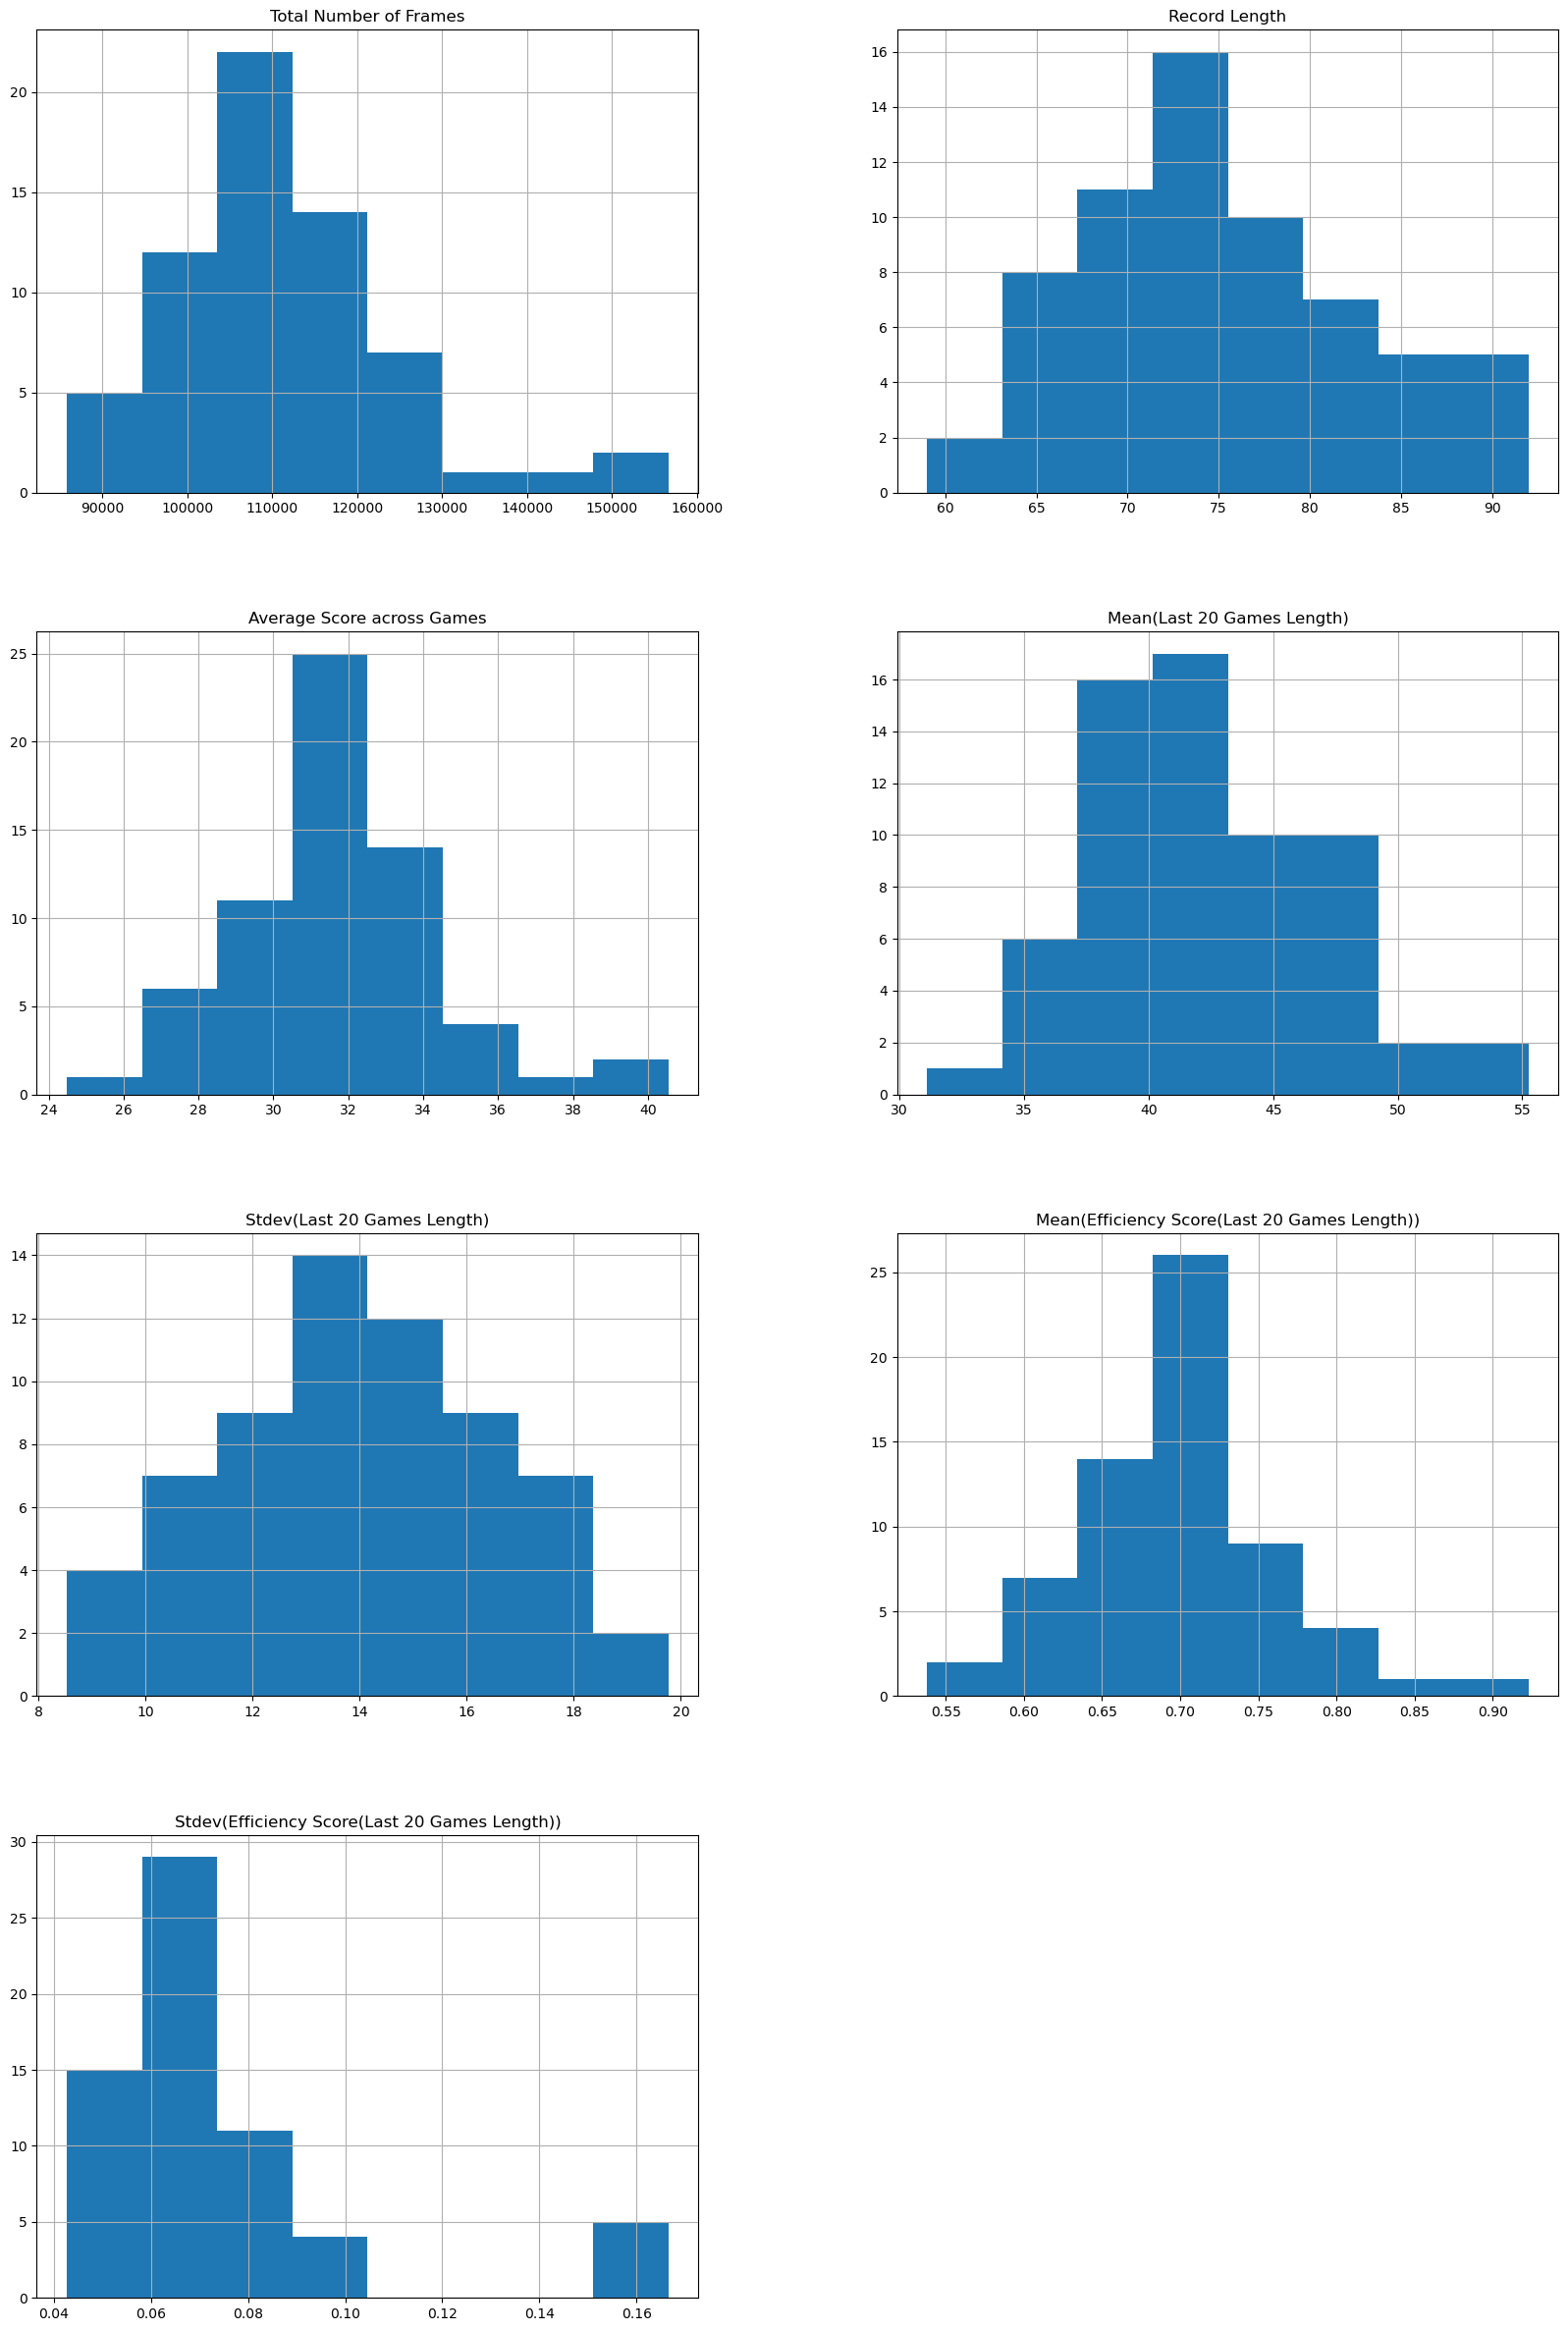

In [9]:
df.hist(bins=8, figsize=(20,30), layout=(4,2))

In [10]:
df.mean()

Total Number of Frames                           111756.687500
Record Length                                        74.984375
Average Score across Games                           31.671484
Mean(Last 20 Games Length)                           42.437500
Stdev(Last 20 Games Length)                          14.042617
Mean(Efficiency Score(Last 20 Games Length))          0.700055
Stdev(Efficiency Score(Last 20 Games Length))         0.074567
dtype: float64

Relative to Phase 1.0
* we have average `Record Length` of 74 (as opposed to ~20 previously)
* we have average `Mean(Last 20 Games Length)` of 42 (as opposed to ~10 previously)
* training is a lot more stable now! we have many more "performant" 
    * however, the `Stdev(Last 20 Games Length)` of 14 is higher than ~8 from phase 1.0... from manual observation of runs, I belive this makes sense since the snake is able to achieve higher scores than before, but can still put itself in a loop before game over... this seems to be based on random placement of food relative to a sufficiently long snakes current positioning on the map
        * based on the current design, there is no framework for the snake to know its about to enter a loop of killing itself, since can only see 1 block ahead and general direction of the food

### Let's see if there are any particularly good parameters

In [17]:
# function to tell the param commonalities between a list of indices
def parse_agent_strings(agent_strings):
    # Initialize a defaultdict to store lists for each parameter
    params = defaultdict(list)

    # Regular expression to match key-value pairs in the format KEY=VALUE
    pattern = r'(\w+)=([\w\.\-]+)'

    for agent_string in agent_strings:
        # Find all key-value pairs in the current string
        matches = re.findall(pattern, agent_string)
        
        # For each key-value pair, store the value in the corresponding list
        for key, value in matches:
            if value.isdigit():
                params[key].append(int(value))
            else:
                try:
                    params[key].append(float(value))
                except ValueError:
                    # If the value is not a number, keep it as a string (e.g., True, False)
                    params[key].append(value)
    
    # Remove duplicates by converting lists to sets and back to lists
    return {key: list(set(values)) for key, values in params.items()}

  
# create histograms for parameters
def plot_agent_strings_params(agent_strings):
    # Initialize a defaultdict to store lists for each parameter
    params = defaultdict(list)

    # Regular expression to match key-value pairs in the format KEY=VALUE
    pattern = r'(\w+)=([\w\.\-]+)'

    # Iterate through each agent string
    for agent_string in agent_strings:
        # Find all key-value pairs in the current string
        matches = re.findall(pattern, agent_string)
        
        # For each key-value pair, store the value in the corresponding list
        for key, value in matches:
            # Convert numerical values to int or float if possible
            if value.isdigit():
                params[key].append(int(value))
            else:
                try:
                    params[key].append(float(value))
                except ValueError:
                    # If the value is not a number, keep it as a string (e.g., True, False)
                    params[key].append(value)
    
    # Now we'll go through each key and create a histogram
    for key, values in params.items():
        # Create a pandas Series from the values list
        values_series = pd.Series(values)
        
        # Get the value counts (frequency) for the values in this key
        value_counts = values_series.value_counts()
        
        # Plot the histogram (bar chart) for this key
        value_counts.plot(kind='bar', edgecolor='black')
        plt.title(f'Histogram of {key}')
        plt.xlabel(key)
        plt.ylabel('Count')
        plt.show()


In [24]:
filtered_df = filtered_df = df[(df['Record Length'] >= 70) &\
                 (df['Mean(Last 20 Games Length)'] >= 40) 
                ]

len(filtered_df)

35

Whereas in Phase 1.0 we had 4/1944 (0.2%) meet the criteria above, in Phase 1.5 we have 35/64 (56%) meet this criteria

Let's just filter by an extreme criteria to see there shared/different params

In [36]:
filtered_df = filtered_df = df[(df['Record Length'] >= 70) &\
                 (df['Mean(Last 20 Games Length)'] >= 50) 
                ]
print(len(filtered_df))
filtered_df

3


,Total Number of Frames,Record Length,Average Score across Games,Mean(Last 20 Games Length),Stdev(Last 20 Games Length),Mean(Efficiency Score(Last 20 Games Length)),Stdev(Efficiency Score(Last 20 Games Length))
"Agent(MAX_MEMORY=5000, BATCH_SIZE=500, ALPHA=0.001, ALPHA_DECAY=True, GAMMA=0.7, EPSILON=0.3, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=60, PRI_REPLAY_EN=True)",149202,92,40.550000,55.25,15.661657,0.686820,0.080150
"Agent(MAX_MEMORY=5000, BATCH_SIZE=500, ALPHA=0.001, ALPHA_DECAY=True, GAMMA=0.7, EPSILON=0.3, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=80, PRI_REPLAY_EN=True)",133465,82,35.791667,54.45,16.353822,0.662996,0.074327
"Agent(MAX_MEMORY=10000, BATCH_SIZE=500, ALPHA=0.001, ALPHA_DECAY=True, GAMMA=0.7, EPSILON=0.3, EPSILON_FLOOR=0.0, EPSILON_LIN_DEC=False, EPSILON_DEC_LIM=60, PRI_REPLAY_EN=True)",143189,86,38.558333,50.65,17.205450,0.619096,0.061068


In [35]:
parse_agent_strings(filtered_df.index)

{'MAX_MEMORY': [5000, 10000],
 'BATCH_SIZE': [500],
 'ALPHA': [0.001],
 'ALPHA_DECAY': ['True'],
 'GAMMA': [0.7],
 'EPSILON': [0.3],
 'EPSILON_FLOOR': [0.0],
 'EPSILON_LIN_DEC': ['False'],
 'EPSILON_DEC_LIM': [80, 60],
 'PRI_REPLAY_EN': ['True']}